In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing


Bad key "text.kerning_factor" on line 4 in
/Users/chenyilu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


task 4a

In [3]:
data_measurement = pd.read_csv("MeasuredData.txt", sep=" ")
data_measurement = pd.DataFrame(data_measurement)

In [4]:
print(data_measurement)

     0.000000000000000000e+00  1.010196822559244811e+00
0                     0.00025                  0.988396
1                     0.00050                  0.985788
2                     0.00075                  1.011550
3                     0.00100                  0.998813
4                     0.00125                  1.007082
..                        ...                       ...
616                   0.24900                  3.478459
617                   0.24925                  3.900490
618                   0.24950                  4.192470
619                   0.24975                  3.739064
620                   0.25000                  3.970118

[621 rows x 2 columns]


In [5]:
t = data_measurement.iloc[:,0]
Tf = data_measurement.iloc[:,1]

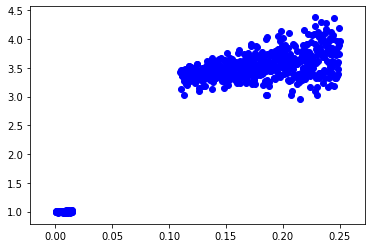

In [6]:
plt.scatter(t, Tf, c="Blue")
plt.show()

4a: the measurements' noise is a function of time t
make use of the measured data to infer the map and provide predictions of the standard deviation on the data stored in the file Task4/TestingDataA.txt. 

In [7]:
data_measurement1 = data_measurement[data_measurement.iloc[:,1] < 1.5] 
data_measurement2 = data_measurement[data_measurement.iloc[:,1] > 1.5]

In [8]:
print(data_measurement1)
print(data_measurement2)

    0.000000000000000000e+00  1.010196822559244811e+00
0                    0.00025                  0.988396
1                    0.00050                  0.985788
2                    0.00075                  1.011550
3                    0.00100                  0.998813
4                    0.00125                  1.007082
5                    0.00150                  0.993155
6                    0.00175                  1.015967
7                    0.00200                  0.985012
8                    0.00225                  0.986389
9                    0.00250                  1.014324
10                   0.00275                  0.973870
11                   0.00300                  1.003826
12                   0.00325                  0.998905
13                   0.00350                  0.992420
14                   0.00375                  0.997922
15                   0.00400                  0.991107
16                   0.00425                  1.016332
17        

In [9]:
print(data_measurement1.shape)
print(data_measurement2.shape)

(60, 2)
(561, 2)


In [10]:
standard_deviation1 = np.zeros(50)
standard_deviation2 = np.zeros(551)

In [11]:
for i in range(5,55,1):
    standard_deviation1[i-5] = data_measurement1.iloc[i-5: i+6,1].std()


In [12]:
for i in range(5, 556,1): 
    standard_deviation2[i-5] = data_measurement2.iloc[i-5:i+6, 1].std()


In [13]:
print(standard_deviation1)
print(standard_deviation2)
print(standard_deviation1.shape)
print(standard_deviation2.shape)

[0.01406528 0.01395674 0.0133763  0.0128117  0.01280365 0.01246859
 0.01387152 0.01433393 0.01381266 0.01321307 0.01302138 0.01094337
 0.01138477 0.01146282 0.01106833 0.01103206 0.0123677  0.01258478
 0.01148365 0.01158787 0.01151259 0.01127205 0.01088945 0.01206968
 0.01224819 0.01254631 0.01583112 0.01555694 0.01471662 0.01536933
 0.01608767 0.01744263 0.01834046 0.01841565 0.01716427 0.0185292
 0.01848846 0.01701323 0.01637599 0.01532962 0.01504405 0.01283664
 0.01235795 0.01214296 0.01283937 0.01451976 0.01531361 0.0154256
 0.01484532 0.01463652]
[0.08725021 0.08593037 0.13432139 0.1163463  0.11515952 0.1214761
 0.12275142 0.12331644 0.12138854 0.11566314 0.11267166 0.11390255
 0.115952   0.07937668 0.09112857 0.08860074 0.07950814 0.08214768
 0.08447866 0.0851053  0.08561662 0.10439171 0.10689267 0.09643092
 0.09644477 0.09746609 0.09556031 0.09576804 0.10063574 0.09862846
 0.09978066 0.10155468 0.09487431 0.08763612 0.07987562 0.08141822
 0.07888228 0.08114673 0.08887113 0.08072

In [14]:
t1 = data_measurement1.iloc[5:55,0]
t2 = data_measurement2.iloc[5:556,0]

In [15]:
print(t1)
print(t2)

5     0.00150
6     0.00175
7     0.00200
8     0.00225
9     0.00250
10    0.00275
11    0.00300
12    0.00325
13    0.00350
14    0.00375
15    0.00400
16    0.00425
17    0.00450
18    0.00475
19    0.00500
20    0.00525
21    0.00550
22    0.00575
23    0.00600
24    0.00625
25    0.00650
26    0.00675
27    0.00700
28    0.00725
29    0.00750
30    0.00775
31    0.00800
32    0.00825
33    0.00850
34    0.00875
35    0.00900
36    0.00925
37    0.00950
38    0.00975
39    0.01000
40    0.01025
41    0.01050
42    0.01075
43    0.01100
44    0.01125
45    0.01150
46    0.01175
47    0.01200
48    0.01225
49    0.01250
50    0.01275
51    0.01300
52    0.01325
53    0.01350
54    0.01375
Name: 0.000000000000000000e+00, dtype: float64
65     0.11125
66     0.11150
67     0.11175
68     0.11200
69     0.11225
        ...   
611    0.24775
612    0.24800
613    0.24825
614    0.24850
615    0.24875
Name: 0.000000000000000000e+00, Length: 551, dtype: float64


pandas.core.series.Series

In [16]:
t1 = t1.to_numpy()
t2 = t2.to_numpy()

In [28]:
type(t)

numpy.ndarray

In [150]:
type(standard_deviation1)
type(standard_deviation2)

numpy.ndarray

In [17]:
sd1 = np.vstack((np.array(t1), np.array(standard_deviation1)))
sd2 = np.vstack((np.array(t2), np.array(standard_deviation2)))

In [18]:
print(sd1)
print(sd1.shape)



[[0.0015     0.00175    0.002      0.00225    0.0025     0.00275
  0.003      0.00325    0.0035     0.00375    0.004      0.00425
  0.0045     0.00475    0.005      0.00525    0.0055     0.00575
  0.006      0.00625    0.0065     0.00675    0.007      0.00725
  0.0075     0.00775    0.008      0.00825    0.0085     0.00875
  0.009      0.00925    0.0095     0.00975    0.01       0.01025
  0.0105     0.01075    0.011      0.01125    0.0115     0.01175
  0.012      0.01225    0.0125     0.01275    0.013      0.01325
  0.0135     0.01375   ]
 [0.01406528 0.01395674 0.0133763  0.0128117  0.01280365 0.01246859
  0.01387152 0.01433393 0.01381266 0.01321307 0.01302138 0.01094337
  0.01138477 0.01146282 0.01106833 0.01103206 0.0123677  0.01258478
  0.01148365 0.01158787 0.01151259 0.01127205 0.01088945 0.01206968
  0.01224819 0.01254631 0.01583112 0.01555694 0.01471662 0.01536933
  0.01608767 0.01744263 0.01834046 0.01841565 0.01716427 0.0185292
  0.01848846 0.01701323 0.01637599 0.01532962 0.

In [19]:
print(sd2)
print(sd2.shape)

[[0.11125    0.1115     0.11175    ... 0.24825    0.2485     0.24875   ]
 [0.08725021 0.08593037 0.13432139 ... 0.28521619 0.28280308 0.26883268]]
(2, 551)


In [20]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
t11 = sd1[0,:]
sd11 = sd1[1,:]
t22 = sd2[0,:]
sd22 = sd2[1,:]
print(t11.shape)
print(t22.shape)
print(sd11.shape)
print(sd22.shape)

(50,)
(551,)
(50,)
(551,)


In [21]:
reg1 = LinearRegression().fit(t11.reshape(-1,1), sd11.reshape(-1,1))
reg2 = LinearRegression().fit(t22.reshape(-1,1), sd22.reshape(-1,1))

In [22]:
data_testing = pd.read_csv("TestingDataA.txt")
data_testing = pd.DataFrame(data_testing) 
data_testing1 = data_testing.iloc[:60,:]
data_testing2 = data_testing.iloc[60:,:]


In [23]:
print(data_testing1.shape)
print(data_testing2.shape)

(60, 1)
(559, 1)


In [24]:
data_testing1 = data_testing1.to_numpy()
data_testing2 = data_testing2.to_numpy()

In [25]:
data_pred1 = reg1.predict(data_testing1)
data_pred2 = reg2.predict(data_testing2)

In [67]:
type(t1)

numpy.ndarray

In [80]:
t1_full = data_measurement1.iloc[:,0]
t2_full = data_measurement2.iloc[:,0]

t1_full = t1_full.to_numpy()
t2_full = t2_full.to_numpy()

measure_pred1 = reg1.predict(t1_full.reshape(-1,1)) 
measure_pred2 = reg2.predict(t2_full.reshape(-1,1)) 

In [81]:
measure_pred = np.vstack((measure_pred1, measure_pred2)) 

In [82]:
print(measure_pred.shape)

(621, 1)


In [76]:
data_measurement_np = data_measurement.to_numpy()
print(data_measurement_np.shape)



(621, 2)


In [83]:
measure_data_fulll = np.append(data_measurement_np, measure_pred, 1)
np.savetxt("MeasureDataFull.txt", measure_data_fulll)

In [72]:
type(data_measurement)

pandas.core.frame.DataFrame

In [69]:
print(measure_pred1)
print(measure_pred2)

[[0.99691759]
 [0.99692307]
 [0.99692855]
 [0.99693403]
 [0.99693951]
 [0.99694499]
 [0.99695047]
 [0.99695595]
 [0.99696142]
 [0.9969669 ]
 [0.99697238]
 [0.99697786]
 [0.99698334]
 [0.99698882]
 [0.9969943 ]
 [0.99699978]
 [0.99700526]
 [0.99701074]
 [0.99701622]
 [0.9970217 ]
 [0.99702717]
 [0.99703265]
 [0.99703813]
 [0.99704361]
 [0.99704909]
 [0.99705457]
 [0.99706005]
 [0.99706553]
 [0.99707101]
 [0.99707649]
 [0.99708197]
 [0.99708745]
 [0.99709293]
 [0.9970984 ]
 [0.99710388]
 [0.99710936]
 [0.99711484]
 [0.99712032]
 [0.9971258 ]
 [0.99713128]
 [0.99713676]
 [0.99714224]
 [0.99714772]
 [0.9971532 ]
 [0.99715868]
 [0.99716415]
 [0.99716963]
 [0.99717511]
 [0.99718059]
 [0.99718607]]
[[0.98128985]
 [0.98145837]
 [0.9816269 ]
 [0.98179543]
 [0.98196395]
 [0.98213248]
 [0.982301  ]
 [0.98246953]
 [0.98263806]
 [0.98280658]
 [0.98297511]
 [0.98314364]
 [0.98331216]
 [0.98348069]
 [0.98364921]
 [0.98381774]
 [0.98398627]
 [0.98415479]
 [0.98432332]
 [0.98449185]
 [0.98466037]
 [0.9

In [26]:
print(data_pred1)
print(data_pred2)

[[0.01188967]
 [0.01195912]
 [0.01202856]
 [0.01209801]
 [0.01216746]
 [0.0122369 ]
 [0.01230635]
 [0.0123758 ]
 [0.01244524]
 [0.01251469]
 [0.01258414]
 [0.01265358]
 [0.01272303]
 [0.01279248]
 [0.01286192]
 [0.01293137]
 [0.01300082]
 [0.01307026]
 [0.01313971]
 [0.01320916]
 [0.0132786 ]
 [0.01334805]
 [0.0134175 ]
 [0.01348694]
 [0.01355639]
 [0.01362584]
 [0.01369528]
 [0.01376473]
 [0.01383418]
 [0.01390362]
 [0.01397307]
 [0.01404252]
 [0.01411196]
 [0.01418141]
 [0.01425086]
 [0.0143203 ]
 [0.01438975]
 [0.0144592 ]
 [0.01452864]
 [0.01459809]
 [0.01466754]
 [0.01473698]
 [0.01480643]
 [0.01487588]
 [0.01494532]
 [0.01501477]
 [0.01508422]
 [0.01515366]
 [0.01522311]
 [0.01529256]
 [0.015362  ]
 [0.01543145]
 [0.0155009 ]
 [0.01557034]
 [0.01563979]
 [0.01570924]
 [0.01577868]
 [0.01584813]
 [0.01591758]
 [0.04237674]]
[[0.06652981]
 [0.06695642]
 [0.06738303]
 [0.06780964]
 [0.06823625]
 [0.06866286]
 [0.06908947]
 [0.06951609]
 [0.0699427 ]
 [0.07036931]
 [0.07079592]
 [0.0

In [31]:
output_4a = np.vstack((data_pred1, data_pred2)) 
type(output_4a)
data_testing_arr = data_testing.to_numpy()
output_4a = np.append(data_testing_arr, output_4a, axis=1)
print(output_4a)

[[2.50250250e-04 1.18896703e-02]
 [5.00500501e-04 1.19591169e-02]
 [7.50750751e-04 1.20285636e-02]
 ...
 [2.49499499e-01 3.03725594e-01]
 [2.49749750e-01 3.04152205e-01]
 [2.50000000e-01 3.04578816e-01]]


In [32]:
np.savetxt("Task4a.txt", output_4a)

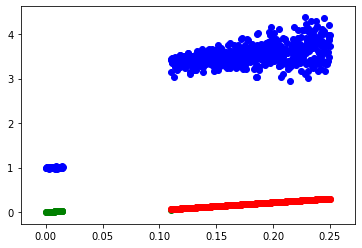

In [26]:
plt.scatter(t, Tf, c="Blue")
plt.scatter(data_testing1, data_pred1, c="Green")
plt.scatter(data_testing2, data_pred2, c="Red")
plt.show()

task 4b 

In [27]:
data_training = pd.read_csv("TrainingData.txt", sep=" ")
data_training = pd.DataFrame(data_training)

In [28]:
t_train = data_training.iloc[:,0]
u_train = data_training.iloc[:,1]
Tf_train = data_training.iloc[:,2]

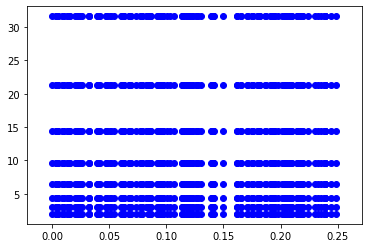

In [70]:
plt.scatter(t_train, u_train, c="Blue")
plt.show()

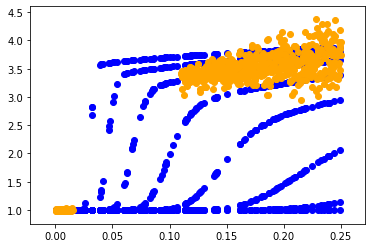

In [81]:
plt.scatter(t_train, Tf_train, c="Blue")
plt.scatter(data_measurement.iloc[:,0], data_measurement.iloc[:,1],c='orange')
plt.show()

infer the reference velocity of the fluid u* generating the recorded measurements. 
This can be done by minimizing a suitable cost function G = 
design a procedure and a suitable cost function G that, given the provided training set S and the measured data, allow you to infer the target velocity u*. 


In [29]:
set(data_training.iloc[:,1])

{1.9952623149688795,
 2.960932939627084,
 4.39397056076079,
 6.520572293428614,
 9.676410537094535,
 14.359617019622153,
 21.30941015366797,
 31.62277660168379}

In [30]:
training_u1 = data_training[data_training.iloc[:,1] == 1.9952623149688795]
training_u2 = data_training[data_training.iloc[:,1] == 2.960932939627084]
training_u3 = data_training[data_training.iloc[:,1] == 4.39397056076079]
training_u4 = data_training[data_training.iloc[:,1] == 6.520572293428614]
training_u5 = data_training[data_training.iloc[:,1] == 9.676410537094535]
training_u6 = data_training[data_training.iloc[:,1] == 14.359617019622153]
training_u7 = data_training[data_training.iloc[:,1] == 21.30941015366797]
training_u8 = data_training[data_training.iloc[:,1] == 31.62277660168379]
print(training_u1.shape)
print(training_u2.shape)
print(training_u3.shape)
print(training_u4.shape)
print(training_u5.shape)
print(training_u6.shape)
print(training_u7.shape)
print(training_u8.shape)

(127, 3)
(128, 3)
(128, 3)
(128, 3)
(128, 3)
(128, 3)
(128, 3)
(128, 3)


In [31]:
training_u1 = training_u1[data_training.iloc[:,0] > 0.10]
training_u2 = training_u2[data_training.iloc[:,0] > 0.10]
training_u3 = training_u3[data_training.iloc[:,0] > 0.10]
training_u4 = training_u4[data_training.iloc[:,0] > 0.10]
training_u5 = training_u5[data_training.iloc[:,0] > 0.10]
training_u6 = training_u6[data_training.iloc[:,0] > 0.10]
training_u7 = training_u7[data_training.iloc[:,0] > 0.10]
training_u8 = training_u8[data_training.iloc[:,0] > 0.10]

/Users/chenyilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/chenyilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/chenyilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/chenyilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/chenyilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/chenyilu/anaconda3/lib/python3.7/site

In [32]:
print(training_u1)
print(training_u1.shape)

     8.250000000000000389e-02  1.995262314968879513e+00  \
0                     0.11450                  1.995262   
4                     0.21775                  1.995262   
5                     0.16575                  1.995262   
7                     0.16525                  1.995262   
9                     0.19225                  1.995262   
..                        ...                       ...   
120                   0.21400                  1.995262   
121                   0.20950                  1.995262   
122                   0.13000                  1.995262   
125                   0.16175                  1.995262   
126                   0.11775                  1.995262   

     1.000000000000035083e+00  
0                    1.000000  
4                    1.001145  
5                    1.000013  
7                    1.000012  
9                    1.000177  
..                        ...  
120                  1.000898  
121                  1.000663  
122

In [33]:
type(training_u1)

pandas.core.frame.DataFrame

In [34]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
t_1 = training_u1.iloc[:,0].values
Tf_1 = training_u1.iloc[:,2].values


t_2= training_u2.iloc[:,0].values
Tf_2 = training_u2.iloc[:,2].values

t_3 = training_u3.iloc[:,0].values
Tf_3 = training_u3.iloc[:,2].values

t_4 = training_u4.iloc[:,0].values
Tf_4 = training_u4.iloc[:,2].values

t_5 = training_u5.iloc[:,0].values
Tf_5 = training_u5.iloc[:,2].values

t_6 = training_u6.iloc[:,0].values
Tf_6 = training_u6.iloc[:,2].values

t_7 = training_u7.iloc[:,0].values
Tf_7 = training_u7.iloc[:,2].values

t_8 = training_u8.iloc[:,0].values
Tf_8 = training_u8.iloc[:,2].values

reg1 = LinearRegression().fit(t_1.reshape(-1,1), Tf_1.reshape(-1,1))
reg2 = LinearRegression().fit(t_2.reshape(-1,1), Tf_2.reshape(-1,1))
reg3 = LinearRegression().fit(t_3.reshape(-1,1), Tf_3.reshape(-1,1))
reg4 = LinearRegression().fit(t_4.reshape(-1,1), Tf_4.reshape(-1,1))
reg5 = LinearRegression().fit(t_5.reshape(-1,1), Tf_5.reshape(-1,1))
reg6 = LinearRegression().fit(t_6.reshape(-1,1), Tf_6.reshape(-1,1))
reg7 = LinearRegression().fit(t_7.reshape(-1,1), Tf_7.reshape(-1,1))
reg8 = LinearRegression().fit(t_3.reshape(-1,1), Tf_8.reshape(-1,1))


In [35]:
reg1.coef_
reg2.coef_
reg3.coef_
reg4.coef_
reg5.coef_
reg6.coef_
reg7.coef_
reg8.coef_

array([[1.10783502]])

In [36]:
gradient = [reg1.coef_[0][0], reg2.coef_[0][0],reg3.coef_[0][0],reg4.coef_[0][0],reg5.coef_[0][0],reg6.coef_[0][0],reg7.coef_[0][0], reg8.coef_[0][0]]

In [37]:
gradient

[0.02191679324077133,
 0.674105097828134,
 7.357827624882223,
 15.218693734606521,
 6.27015155708555,
 2.620619906039324,
 1.7003288514014971,
 1.1078350220724138]

In [38]:
type(gradient)

list

In [39]:
u= set(data_training.iloc[:,1])

In [40]:
type(u)

set

In [41]:
gradient = np.array(list(gradient))
type(gradient)



numpy.ndarray

In [42]:
u = np.array(list(u))
type(u)

numpy.ndarray

In [43]:
reg = LinearRegression().fit(gradient.reshape(-1,1), u.reshape(-1,1))

In [44]:
t2_measurement = data_measurement2.iloc[:,0].values
Tf2_measurement = data_measurement2.iloc[:,1].values

reg_measurement = LinearRegression().fit(t2_measurement.reshape(-1,1), Tf2_measurement.reshape(-1,1))

grad_measurement = reg_measurement.coef_

print(grad_measurement)


[[2.63102207]]


In [207]:
u_star = reg.predict(grad_measurement)

In [208]:
print(u_star)

[[12.57793378]]


4c perform Bayesian inference and provide 1000 samples drawn from the posterior distribution. 
use the following prior and likelihood 
with f being a suitable model for the distribution's mean, dependent on t and u. 
save the posterior samples in the file

In [45]:
import pyro
import pyro.distributions as dist
import torch
import matplotlib.pyplot as plt
from pyro.infer import MCMC, NUTS, HMC
import seaborn as sns
from torch.distributions import MultivariateNormal
import pickle
import numpy as np
import os

In [46]:
pip install pyro-ppl

You should consider upgrading via the '/Users/chenyilu/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [47]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons or units per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        if self.n_hidden_layers != 0:
            self.input_layer = nn.Linear(self.input_dimension, self.neurons)
            self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers-1)])
            self.output_layer = nn.Linear(self.neurons, self.output_dimension)

        else:
            print("Simple linear regression")
            self.linear_regression_layer = nn.Linear(self.input_dimension, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        if self.n_hidden_layers != 0:
            x = self.activation(self.input_layer(x))
            for k, l in enumerate(self.hidden_layers):
                x = self.activation(l(x))
            return self.output_layer(x)
        else:
            return self.linear_regression_layer(x)

def NeuralNet_Seq(input_dimension, output_dimension, n_hidden_layers, neurons):
    modules = list()
    modules.append(nn.Linear(input_dimension, neurons))
    modules.append(nn.Tanh())
    for _ in range(n_hidden_layers):
        modules.append(nn.Linear(neurons, neurons))
        modules.append(nn.Tanh())
    modules.append(nn.Linear(neurons, output_dimension))
    model =  nn.Sequential(*modules)
    return model


In [48]:
my_network = NeuralNet(input_dimension = 2, output_dimension = 1, n_hidden_layers=2, neurons =20)

In [49]:
opt_type = "ADAM"

In [50]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.0001, weight_decay=0)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [51]:
def fit(model, training_set, x_validation_, y_validation_, num_epochs, optimizer, p, verbose=True):
    history = [[], []]
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (x_train_, u_train_) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                u_pred_ = model(x_train_)
                # Item 1. below
                loss = torch.mean(abs(u_pred_.reshape(-1, ) - u_train_.reshape(-1, ))**p)
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()/ len(training_set)
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        y_validation_pred_ = model(x_validation_)
        validation_loss = torch.mean((y_validation_pred_.reshape(-1, ) - y_validation_.reshape(-1, ))**p).item()
        history[0].append(running_loss[0])
        history[1].append(validation_loss)
        
        if verbose:
            print('Training Loss: ', np.round(running_loss[0],8))
            print('Validation Loss: ', np.round(validation_loss,8))
            
    print('Final Training Loss: ', np.round(history[0][-1],8))
    print('Final Validation Loss: ', np.round(history[1][-1],8))
    return history

In [52]:
data_training.shape[0]
validation_size = int(30*data_training.shape[0]/100)
training_size = data_training.shape[0] - validation_size

x_train = data_training.iloc[:training_size,:2]
y_train = data_training.iloc[:training_size,2]

x_val = data_training.iloc[training_size:,0:2]
y_val = data_training.iloc[training_size:,2]

x_val = torch.from_numpy(x_val.values).float()
y_val = torch.from_numpy(y_val.values).float()

batch_size = 5
training_set = DataLoader(torch.utils.data.TensorDataset(torch.from_numpy(x_train.values).float(), torch.from_numpy(y_train.values).float()), batch_size= batch_size, shuffle = True)

In [53]:
type(x_val)


torch.Tensor

In [54]:
n_epochs= 500
history = fit(my_network, training_set, x_val, y_val, n_epochs, optimizer_, p=2, verbose = False)

Final Training Loss:  0.0268902
Final Validation Loss:  0.45463693


In [55]:
def G(inputs): 
    pred_mean = my_network(inputs).detach().reshape(-1,1)[0]
    return pred_mean

In [56]:
mu_prior = 12
sigma_prior = 4
sigma_likelihood = 0.075

def model(t, T):
    # Prior is a gaussian distriubtion with mean 0 and standard deviation 0.1
    prior_u = dist.Normal(mu_prior, sigma_prior)
    u = pyro.sample("u", prior_u)
    u = u.expand(t.shape[0], 1)
    inputs = torch.cat([t, u], 1)
    mean = G(inputs)
    # Likelihood is a gaussian distriubtion with mean G(x,w)=wx and standard deviation 0.1
    likelihood = dist.Normal(mean, sigma_likelihood)
    u_sampled = pyro.sample("obs", likelihood, obs=T)


In [57]:
measured_data_input=torch.Tensor(data_measurement.iloc[:,0].values.astype(np.float).reshape(-1,1))
measured_data_output= torch.Tensor(data_measurement.iloc[:,1].values.astype(np.float).reshape(-1,1))

measured_data_input = torch.from_numpy(data_measurement.iloc[:,0].values.reshape(-1,1)).float()
measured_data_output = torch.from_numpy(data_measurement.iloc[:,1].values.reshape(-1,1)).float()
type(measured_data_input)
type(measured_data_output)

torch.Tensor

In [58]:
G(torch.cat([measured_data_input, measured_data_output], 1).float())

tensor([1.1442])

In [59]:
n_samples = 10000
nuts_kernel = NUTS(model)
posterior = MCMC(nuts_kernel, num_samples=n_samples, warmup_steps=1000, initial_params={"u": torch.tensor(mu_prior)})
posterior.run(measured_data_input, measured_data_output)
#hmc_samples = {k: v.detach().cpu().numpy() for k, v in posterior.get_samples().items()}

Warmup:   0%|          | 0/11000 [00:00, ?it/s]

RuntimeError: only Tensors of floating point dtype can require gradients